### Cross Validation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pandas_profiling as pp


warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



In [2]:
def get_train_data(num=7):
    i = 0
    file_name = f'temp_data/agg/agg_train_data_plus_last_0000000{i:05}.csv'
    print(file_name)
    df = pd.read_csv(file_name, index_col=0)
    i = 1
    for i in range(1, num):
        
        file_name = f'temp_data/agg/agg_train_data_plus_last_0000000{i:05}.csv'
        if not os.path.isfile(file_name): 
            break
        print(file_name)
        tmp = pd.read_csv(file_name, index_col=0)
        df = pd.concat([df, tmp])
        i = i + 1

    return df

def get_test_data(num=13):
    i = 0
    file_name = f'temp_data/agg/agg_test_data_plus_last_0000000{i:05}.csv'
    print(file_name)
    df = pd.read_csv(file_name, index_col=0)
    i = 1
    for i in range(1, num):
        file_name = f'temp_data/agg/agg_test_data_plus_last_0000000{i:05}.csv'
        if not os.path.isfile(file_name): 
            break
        print(file_name)
        tmp = pd.read_csv(file_name, index_col=0)
        df = pd.concat([df, tmp])
        i = i + 1

    return df

def get_train_valid_data():
    file_name = 'input/train_labels.csv'
    print(file_name)
    df = pd.read_csv(file_name, index_col=0)
    return df


In [3]:
train = get_train_data(1)
test = get_test_data(1)
valid = get_train_valid_data()


temp_data/agg/agg_train_data_plus_last_000000000000.csv
temp_data/agg/agg_test_data_plus_last_000000000000.csv
input/train_labels.csv


In [4]:
# 計算時間削減のため行をへらす
train = train[:10000]
test = test[:10000]
valid = valid[:10000]



In [5]:
train

,count,S_2_min,S_2_max,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,...,P_4_ldiff,D_74_last,D_74_ldiff,D_75_last,D_75_ldiff,D_76_last,D_76_ldiff,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40

In [6]:
valid

,target
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0
...,...
059da0f2ad23d7206b77787ebd4f8363d4664d001ec7516ad5ba5ee884c2cbbe,0
059dcec39ffc373f6057caa80aa7fd72f962a8dbc4d294e7f13f0d9484040175,0
059e38d9559ad3ff433427c8b91d3c3151d840b26504d6399b4274f9adbc1541,1


In [7]:
test

,count,S_2_min,S_2_max,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,...,P_4_ldiff,D_74_last,D_74_ldiff,D_75_last,D_75_ldiff,D_76_last,D_76_ldiff,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40

In [8]:
%%time
data = pd.concat([train, valid], axis=1, join='inner')
data = pd.concat([data, test], sort=False)
data


CPU times: user 129 ms, sys: 90.8 ms, total: 219 ms
Wall time: 240 ms


,count,S_2_min,S_2_max,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,...,D_74_last,D_74_ldiff,D_75_last,D_75_ldiff,D_76_last,D_76_ldiff,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40_last,B_40

In [9]:
%%time
data['S_2_min_y'] = data['S_2_min'].str[:4].astype(int)
data['S_2_min_m'] = data['S_2_min'].str[5:7].astype(int)
data['S_2_min_d'] = data['S_2_min'].str[8:10].astype(int)
data['S_2_max_y'] = data['S_2_max'].str[:4].astype(int)
data['S_2_max_m'] = data['S_2_max'].str[5:7].astype(int)
data['S_2_max_d'] = data['S_2_max'].str[8:10].astype(int)
data['S_2_max_d'] = data['S_2_max'].str[8:10].astype(int)
del data['S_2_min']
del data['S_2_max']
data

CPU times: user 109 ms, sys: 6.34 ms, total: 116 ms
Wall time: 115 ms


,count,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,R_7_max,R_7_avg,...,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40_last,B_40_ldiff,S_27_last,S_27_ldiff,D_113_last,D_113_ldiff,D_114_last_n

In [10]:
%%time
data = data.fillna(value=0)
data

CPU times: user 291 ms, sys: 246 ms, total: 537 ms
Wall time: 587 ms


,count,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,R_7_max,R_7_avg,...,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40_last,B_40_ldiff,S_27_last,S_27_ldiff,D_113_last,D_113_ldiff,D_114_last_n

In [11]:
%%time
data.describe()
# data.info()
# data

CPU times: user 3.68 s, sys: 92.8 ms, total: 3.78 s
Wall time: 3.89 s


,count,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,R_7_max,R_7_avg,...,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40_last,B_40_ldiff,S_27_last,S_27_ldiff,D_113_last,D_113_ldiff,D_114_last_n

In [12]:
%%time
valid =  data[:len(train)]['target']
del data['target']
train = data[:len(train)]
test = data[len(train):]


CPU times: user 3.77 ms, sys: 1.33 ms, total: 5.1 ms
Wall time: 5.56 ms


  0%|                                                                                                                                  | 0/1008 [00:00<?, ?it/s]


説明変数の数n= 1
平均のPR_AUC: 0.7613554788703444


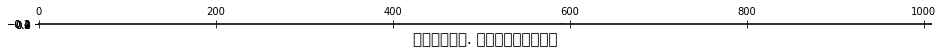

  0%|                                                                                                                          | 1/1008 [00:01<21:06,  1.26s/it]


説明変数の数n= 2


In [ ]:
# 選ぶ変数の数を探索
from tqdm import tqdm
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

##make matrix
X = train
y =  valid

scores=[]
for n in tqdm(range(1,len(X.columns))):
    print('\n説明変数の数n=',n)
    ##select features
    select = SelectKBest(k=n)
    select.fit(X, y)
    mask = select.get_support()
    X_selected = X.iloc[:,mask]
    ##10-foldCV, LogisticRegression, PR_AUC
    pr_auc = cross_val_score(LogisticRegression(), X_selected, y, scoring="average_precision", cv=10)
    scores.append(np.mean(pr_auc))    
    print('平均のPR_AUC:',scores[n-1])

    ## visualization
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    plt.tick_params(labelleft = 'off')
    plt.xlabel('使われた特徴. 黒が選択されたもの', fontsize=15)
    plt.show()

In [ ]:
scores

In [ ]:
# 特徴量の数とscoreの関係をグラフ化
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.plotting import figure

p = figure(
    title = "n vs. PR_AUC", 
    plot_width=500, plot_height=500,
)
p.line(
    range(1,len(scores)+1),
    scores
)
show(p)

In [ ]:
# 上記グラフから選んだ特徴量数で列を選択する
from tqdm import tqdm
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

n = 280

##make matrix
X = train
y =  valid

scores=[]
print('\n説明変数の数n=',n)
##select features
select = SelectKBest(k=n)
select.fit(X, y)
mask = select.get_support()
X_selected = X.iloc[:,mask]
##10-foldCV, LogisticRegression, PR_AUC
pr_auc = cross_val_score(LogisticRegression(), X_selected, y, scoring="average_precision", cv=10)
score = np.mean(pr_auc)
print('平均のPR_AUC:', score)
    

In [ ]:
X_selected
